# Hierachical Clustering

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.cm as cm

In [23]:
X, y, c = make_blobs(n_samples=500, centers=4, cluster_std=0.80, random_state=13, return_centers=True)

In [24]:
df_blobs = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df_blobs['Cluster_blobs'] = y
df_blobs.head()

,Feature 1,Feature 2,Cluster_blobs
0,3.112512,5.934473,3
1,5.204332,-4.810841,0
2,10.834431,0.382692,2
3,3.022716,5.148079,3
4,10.040869,-0.398202,2


In [25]:
c

array([[ 5.55404821, -5.2491756 ],
       [ 6.48557065,  9.31498396],
       [ 9.45202228, -0.93101505],
       [ 2.18084926,  5.51053029]])

In [26]:
df_centers = pd.DataFrame(c, columns=['Feature 1', 'Feature 2'])
df_centers.head()

,Feature 1,Feature 2
0,5.554048,-5.249176
1,6.485571,9.314984
2,9.452022,-0.931015
3,2.180849,5.510530


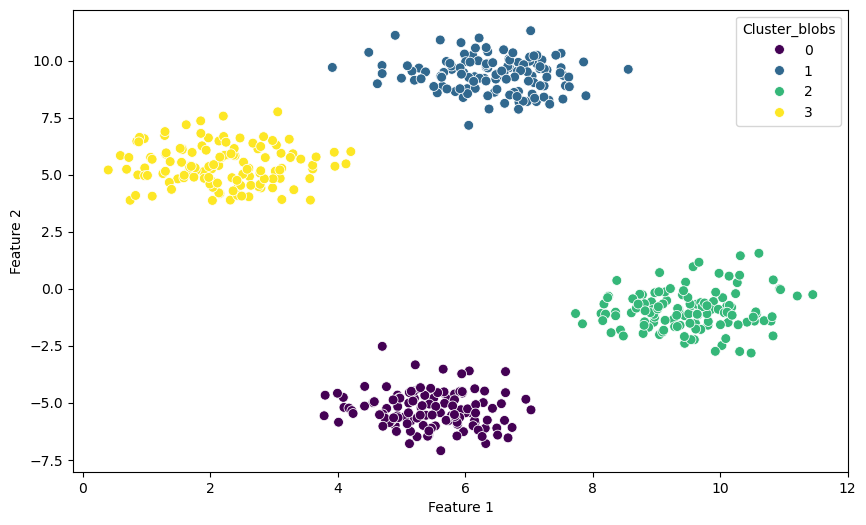

In [27]:
# visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_blobs, x='Feature 1', y='Feature 2', hue='Cluster_blobs', palette='viridis', s=50)
plt.show()

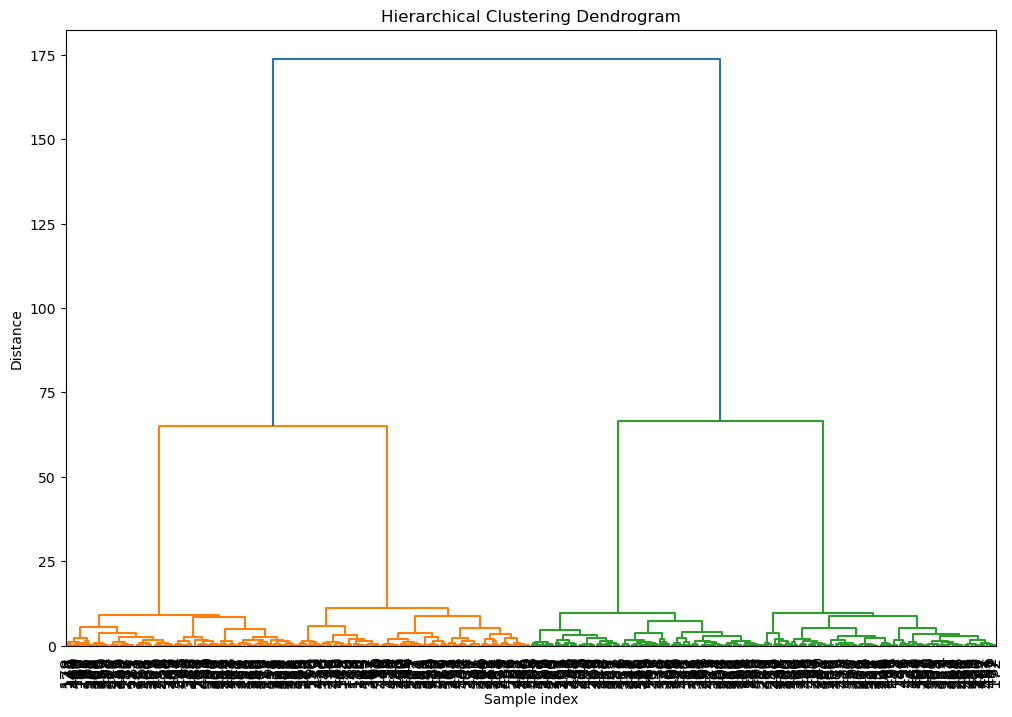

In [28]:
# Dendrogram
plt.figure(figsize=(12, 8))
Z = linkage(X, method='ward')
dendrogram(Z, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [31]:
# model

model_hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = model_hc.fit_predict(X)

In [32]:
df_blobs['cluster_hc'] = y_hc

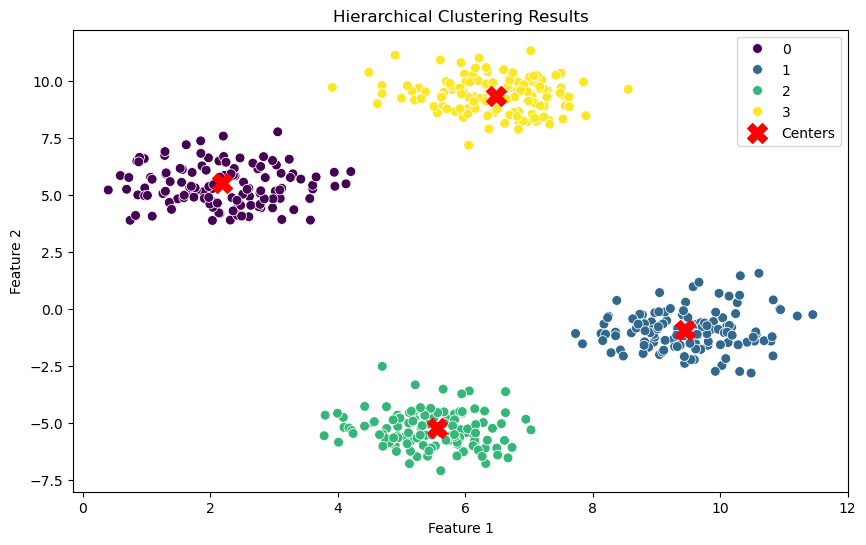

In [33]:
# visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_blobs, x='Feature 1', y='Feature 2', hue='cluster_hc', palette='viridis', s=50)
plt.scatter(df_centers['Feature 1'], df_centers['Feature 2'], color='red', s=200, marker='X', label='Centers')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Model Evaluation

In [34]:
# model evaluation with silhouette score
silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg:.2f}')

Silhouette Score for Hierarchical Clustering: 0.76


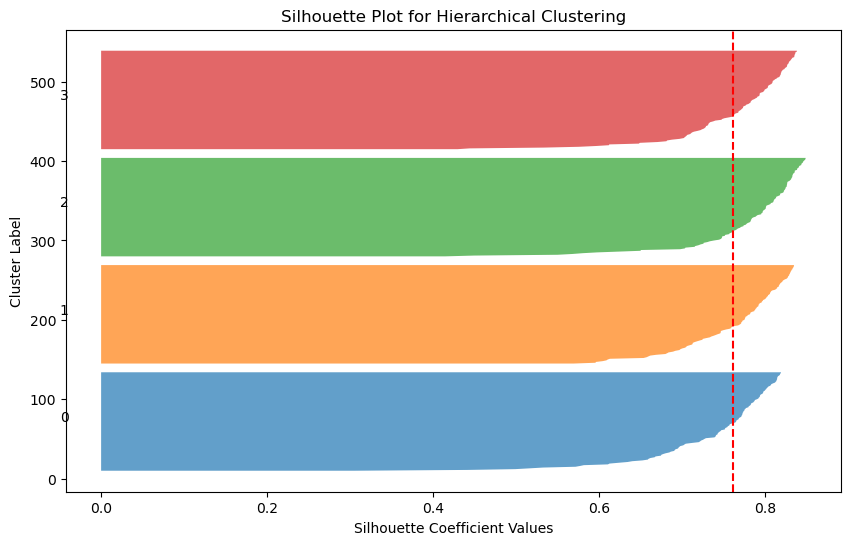

In [36]:
# vizualize silhouette scores
sample_silhouette_values = silhouette_samples(X, y_hc)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[y_hc == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples
plt.title('Silhouette Plot for Hierarchical Clustering')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.show()


# Another way

For n_clusters = 3 The average silhouette_score is : 0.7043925681776334
For n_clusters = 4 The average silhouette_score is : 0.7617691071062652
For n_clusters = 5 The average silhouette_score is : 0.6563570869161148


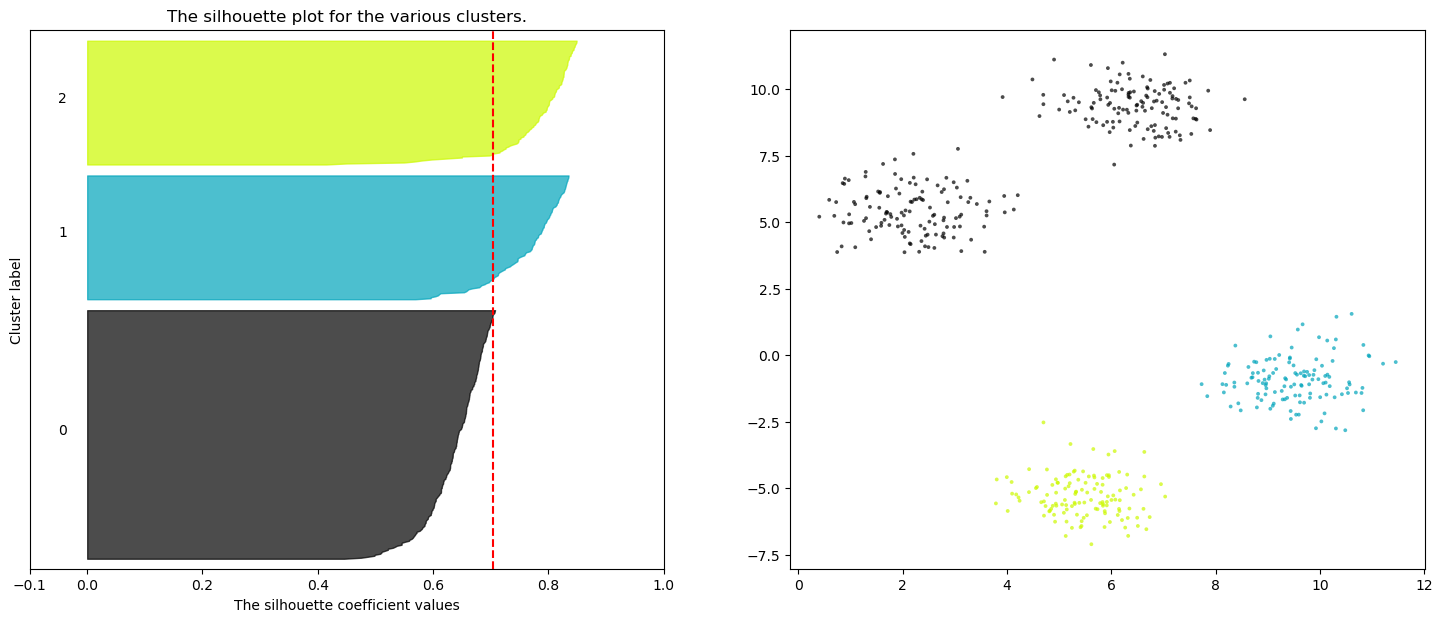

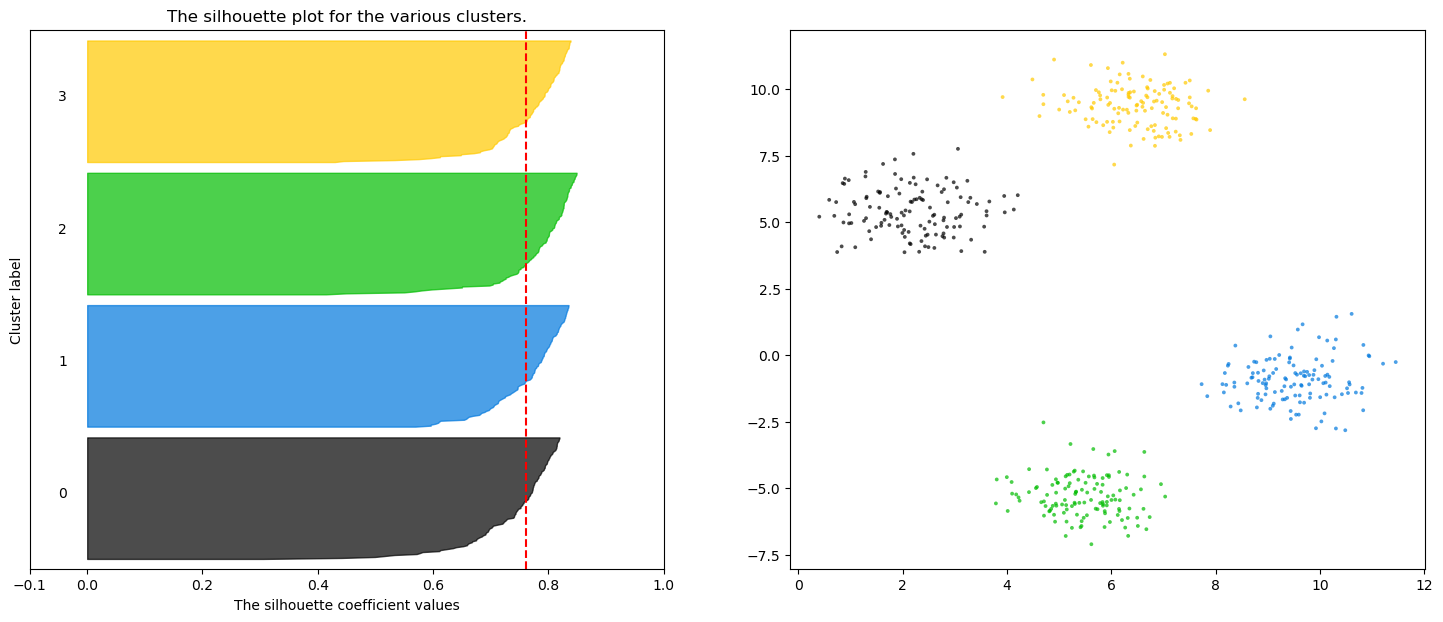

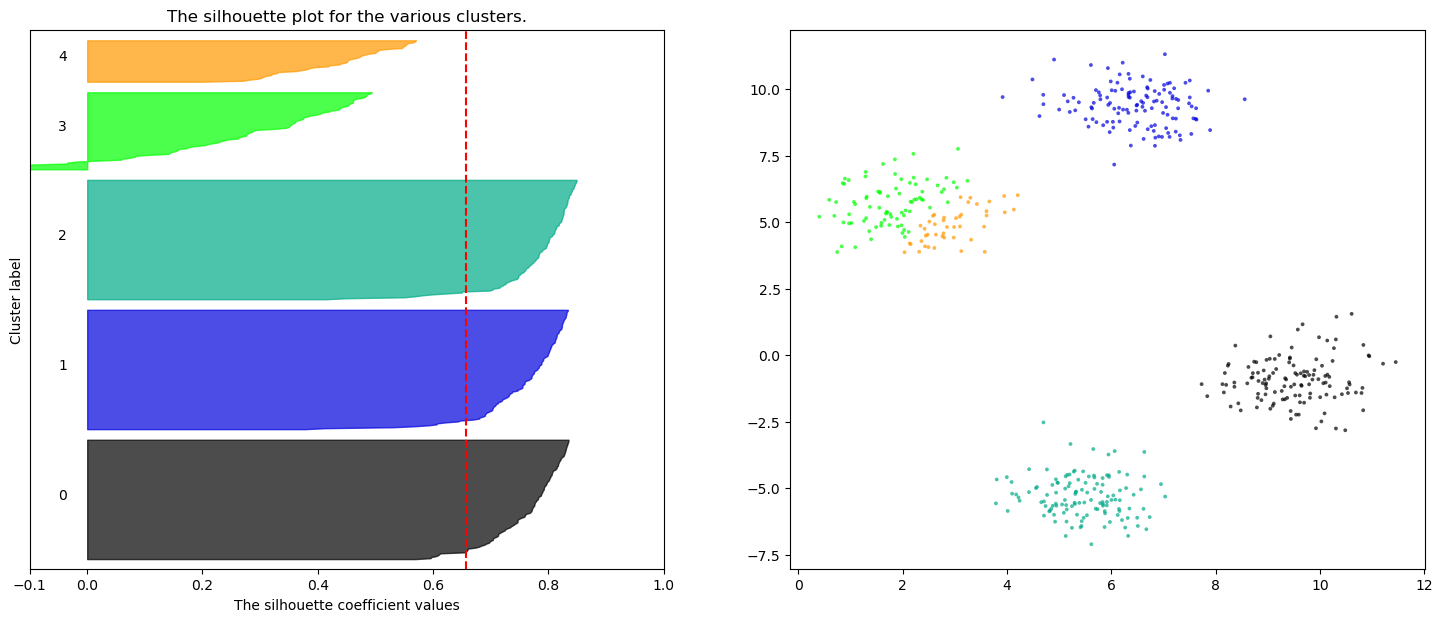

In [39]:
range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
plt.show()